In [1]:
%matplotlib inline
import sys 
import matplotlib.pyplot as plt
sys.path.append('..')
from preamble import *

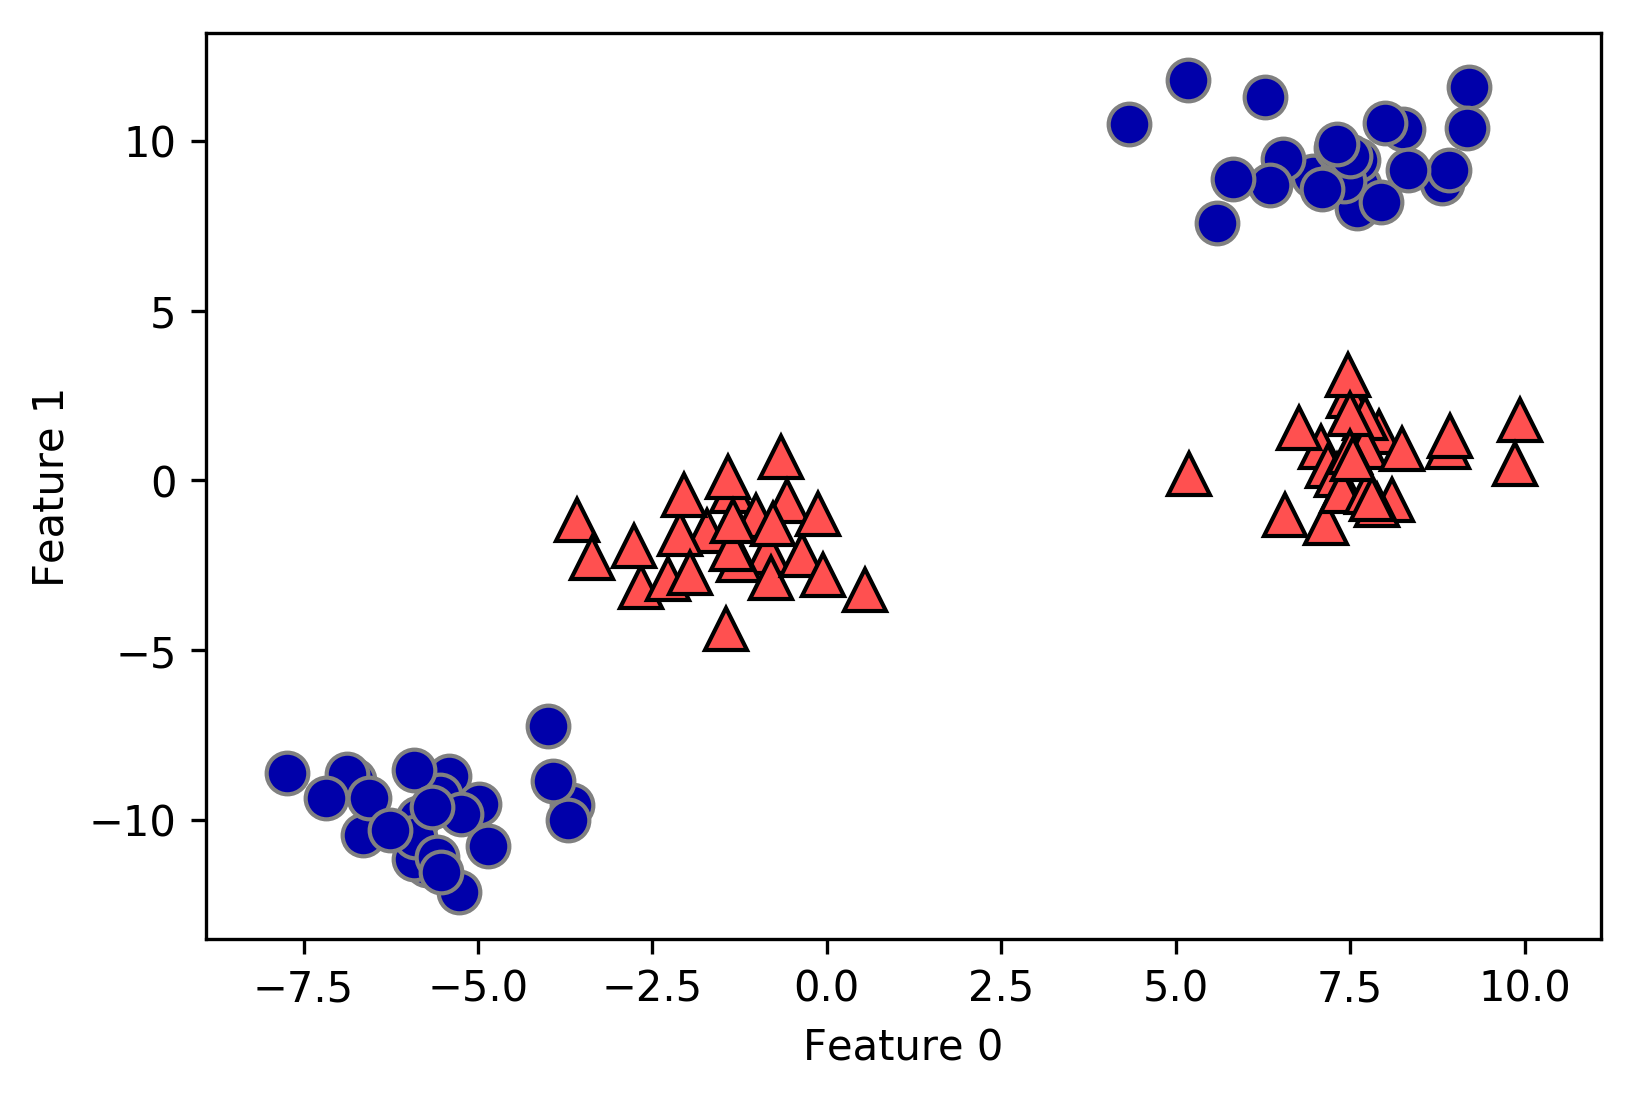

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

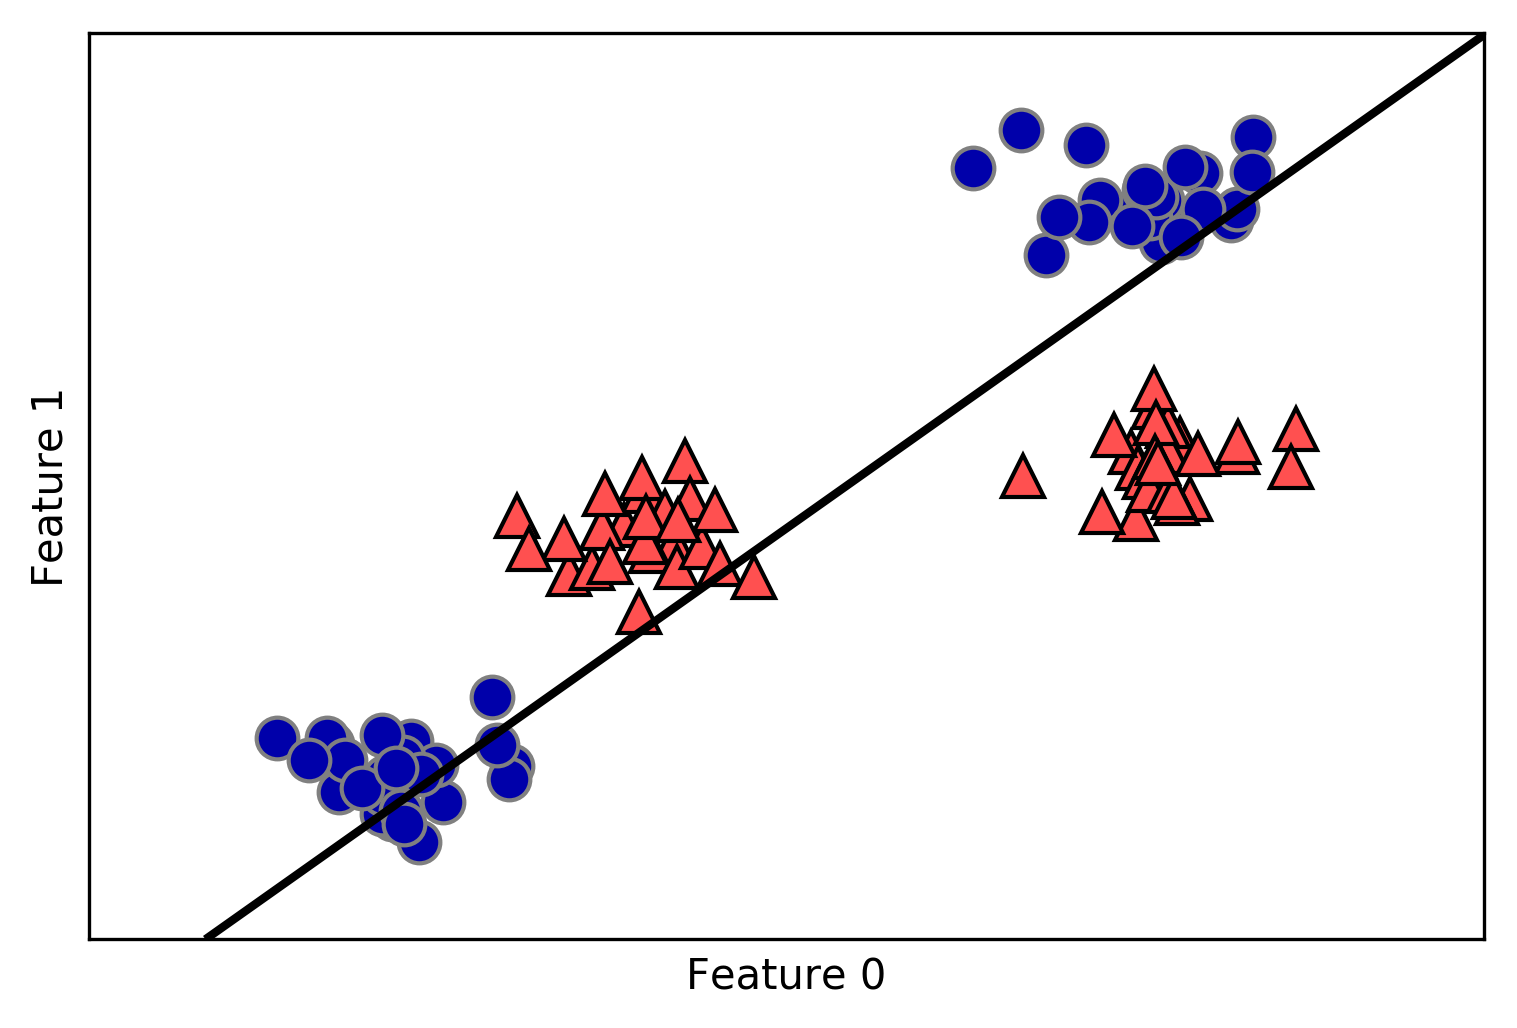

In [3]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [4]:
# add the squared first feature
# 모든 행(:)에 대해 1번째 열(1:)의 제곱 값을 덧붙임
X_new = np.hstack([X, X[:, 1:] ** 2])
print("X - Data shape: {}".format(X.shape))
print(X[0])
print(X[1])
print(X[2])
print()

print("X_new - Data shape: {}".format(X_new.shape))
print(X_new[0])
print(X_new[1])
print(X_new[2])

X - Data shape: (100L, 2L)
[-1.722 -1.48 ]
[-3.657 -9.548]
[ 7.078  0.995]
()
X_new - Data shape: (100L, 3L)
[-1.722 -1.48   2.191]
[ -3.657  -9.548  91.169]
[ 7.078  0.995  0.99 ]


False
True
False


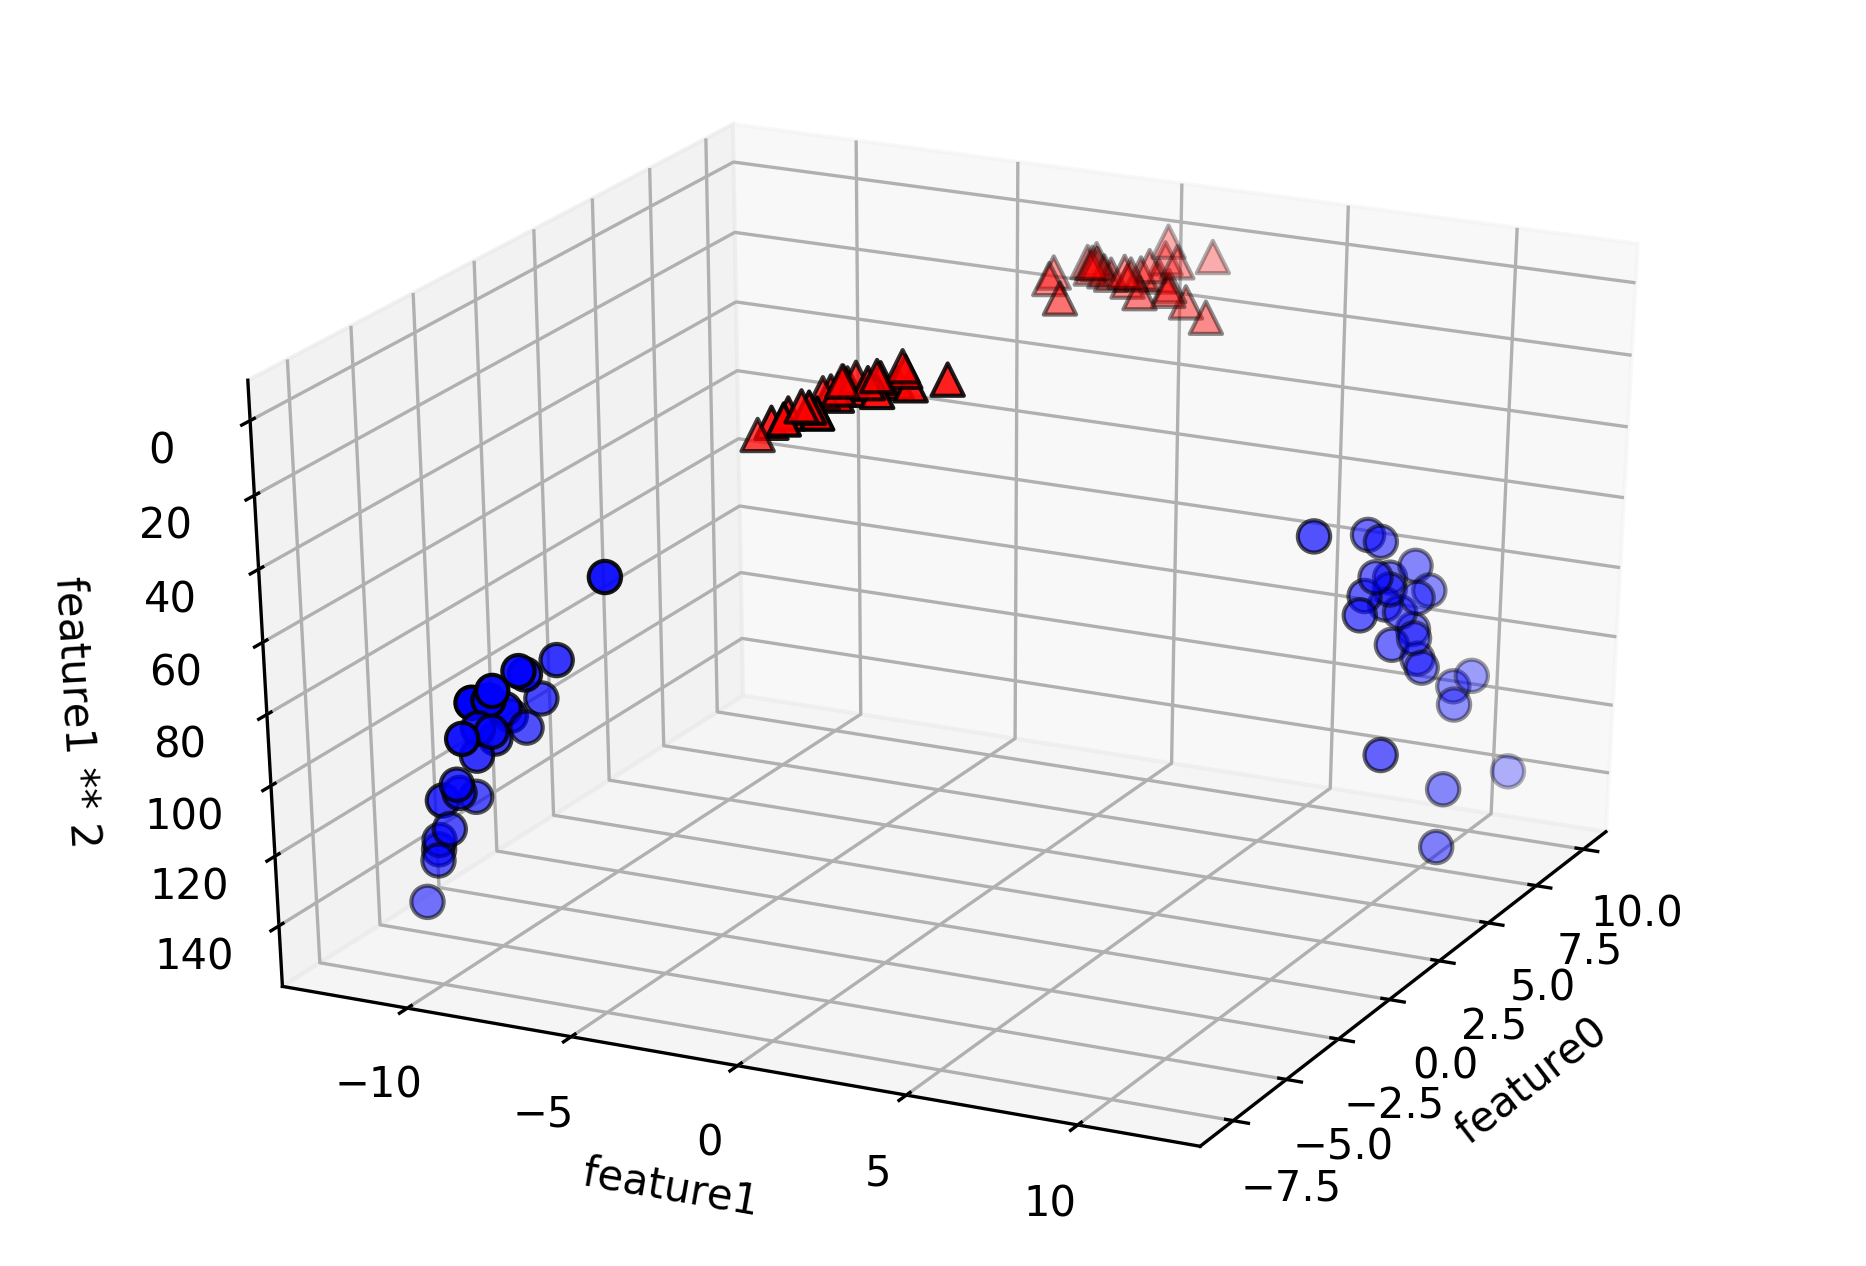

In [5]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D

ax = Axes3D(figure, elev=-152, azim=-26)

# plot first all the points with y==0, then all with y == 1
mask = y == 0
print(mask[0])
print(mask[1])
print(mask[2])

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In [6]:
linear_svm_3d = LinearSVC().fit(X_new, y)

coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

print("coef shape:", coef.shape)
print(coef)
print("intercept shape:", intercept.shape)
print(intercept)

('coef shape:', (3L,))
[ 0.115 -0.192 -0.057]
('intercept shape:', (1L,))
[ 1.152]


In [7]:
# show linear decision boundary
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
print("xx shape:", xx.shape)
print("yy shape:", xx.shape)
print(xx[0], xx[1], "...", xx[-1])
print(yy[0], yy[1], "...", yy[-1])

print()

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
print("XX shape:", XX.shape)
print("YY shape:", YY.shape)
print("ZZ shape:", ZZ.shape)
print(XX[0])
print(XX[1])

print(YY[0])
print(YY[1])

print(ZZ[0])
print(ZZ[1])

('xx shape:', (50L,))
('yy shape:', (50L,))
(-9.7406465808045652, -9.2984093440187792, '...', 11.928978021698963)
(-14.118806977213685, -13.549430354010138, '...', 13.78064755976018)
()
('XX shape:', (50L, 50L))
('YY shape:', (50L, 50L))
('ZZ shape:', (50L, 50L))
[ -9.741  -9.298  -8.856  -8.414  -7.972  -7.529  -7.087  -6.645  -6.203
  -5.761  -5.318  -4.876  -4.434  -3.992  -3.549  -3.107  -2.665  -2.223
  -1.78   -1.338  -0.896  -0.454  -0.011   0.431   0.873   1.315   1.758
   2.2     2.642   3.084   3.526   3.969   4.411   4.853   5.295   5.738
   6.18    6.622   7.064   7.507   7.949   8.391   8.833   9.276   9.718
  10.16   10.602  11.045  11.487  11.929]
[ -9.741  -9.298  -8.856  -8.414  -7.972  -7.529  -7.087  -6.645  -6.203
  -5.761  -5.318  -4.876  -4.434  -3.992  -3.549  -3.107  -2.665  -2.223
  -1.78   -1.338  -0.896  -0.454  -0.011   0.431   0.873   1.315   1.758
   2.2     2.642   3.084   3.526   3.969   4.411   4.853   5.295   5.738
   6.18    6.622   7.064   7.507   7.

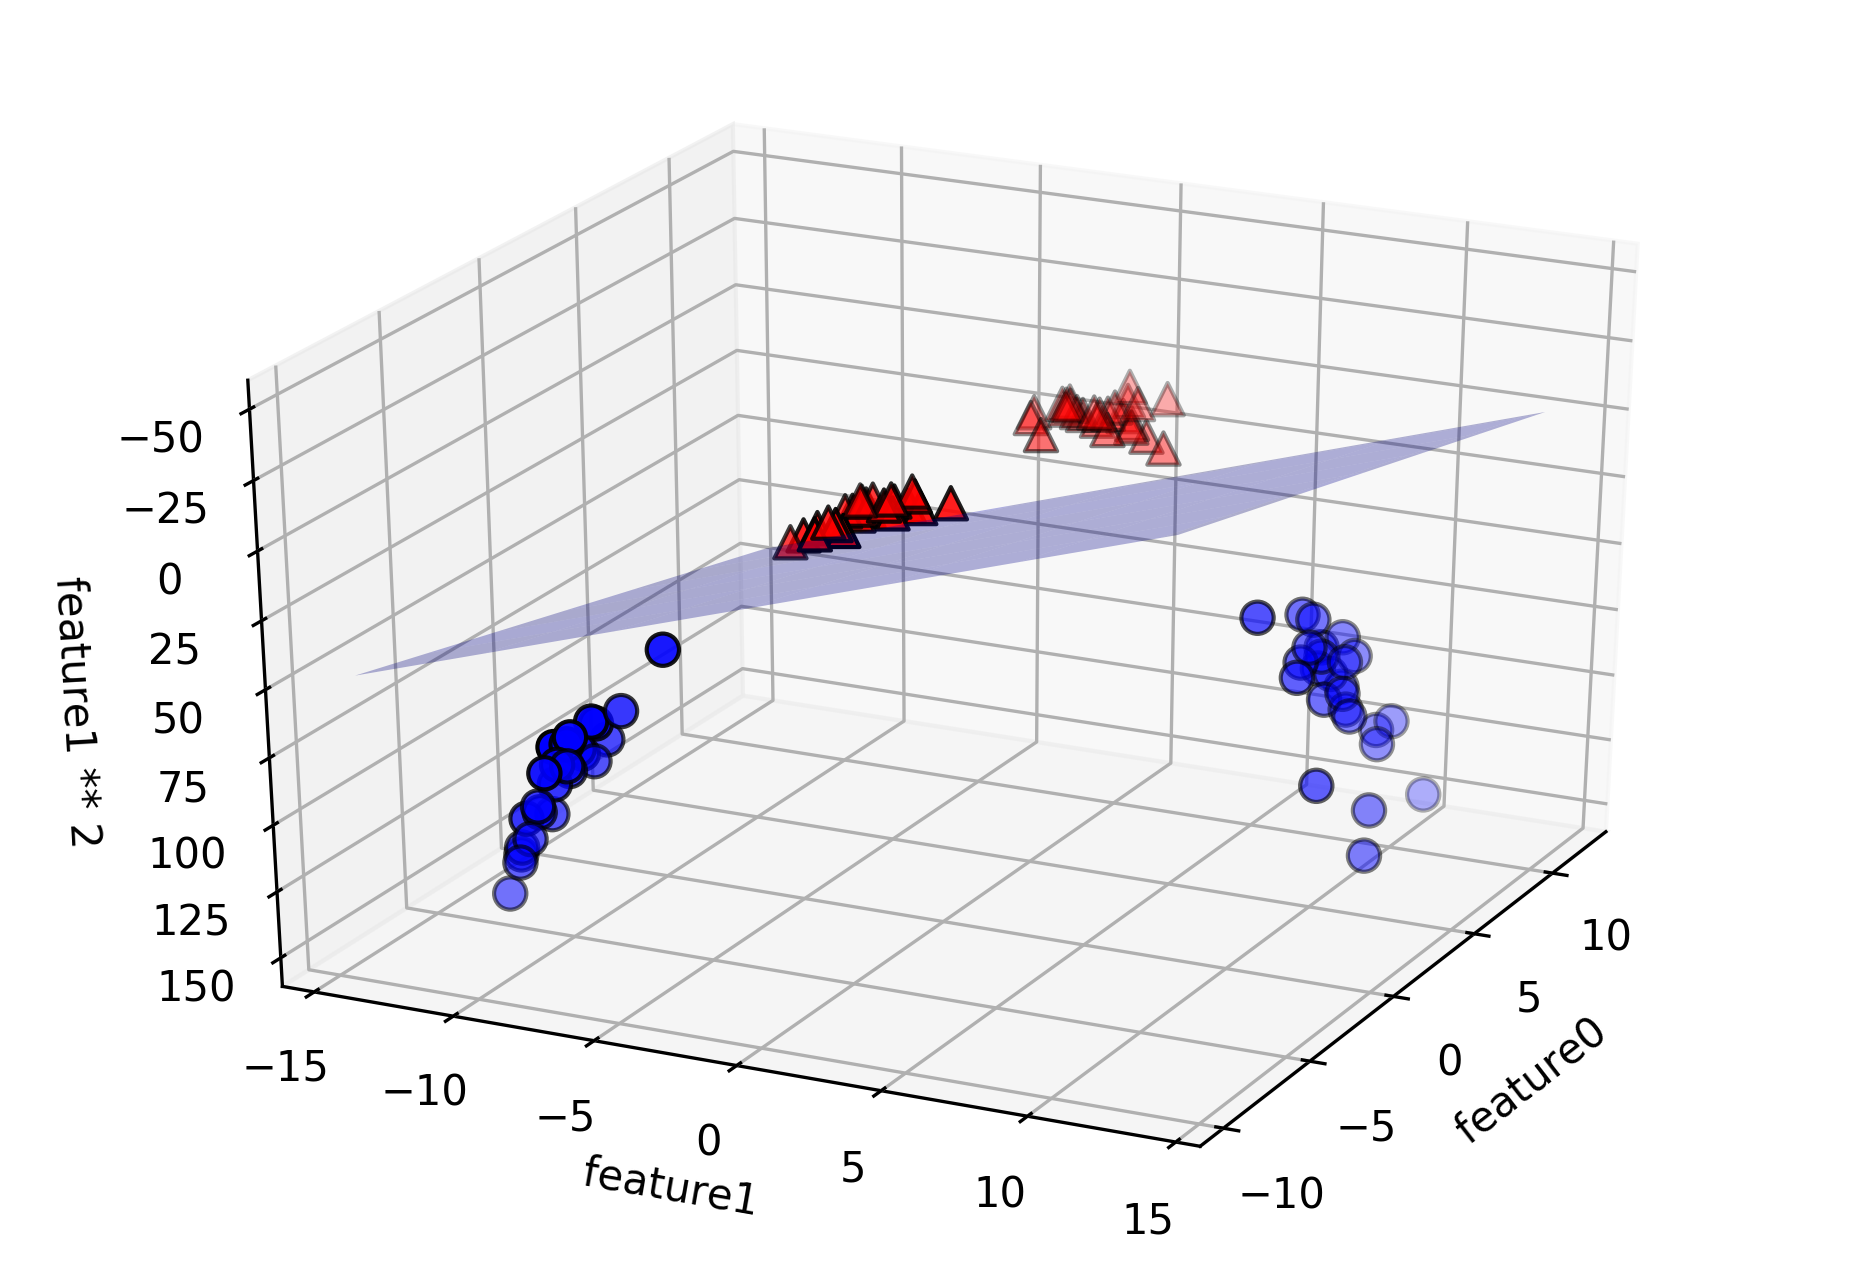

In [8]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In [9]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.c_.html
type(np.c_)

numpy.lib.index_tricks.CClass

In [10]:
print(XX.ravel()[0], XX.ravel()[1], "...", XX.ravel()[-1])
print(YY.ravel()[0], YY.ravel()[1], "...", YY.ravel()[-1])
print(ZZ.ravel()[0], ZZ.ravel()[1], "...", ZZ.ravel()[-1])

print()

c = np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]
print(c.shape)
print(c[0])
print(c[1])
print(c[-1])

(-9.7406465808045652, -9.2984093440187792, '...', 11.928978021698963)
(-14.118806977213685, -14.118806977213685, '...', 13.78064755976018)
(48.388288245355689, 49.283192093519524, '...', -2.1540522370151485)
()
(2500L, 3L)
[ -9.741 -14.119  48.388]
[ -9.298 -14.119  49.283]
[ 11.929  13.781  -2.154]


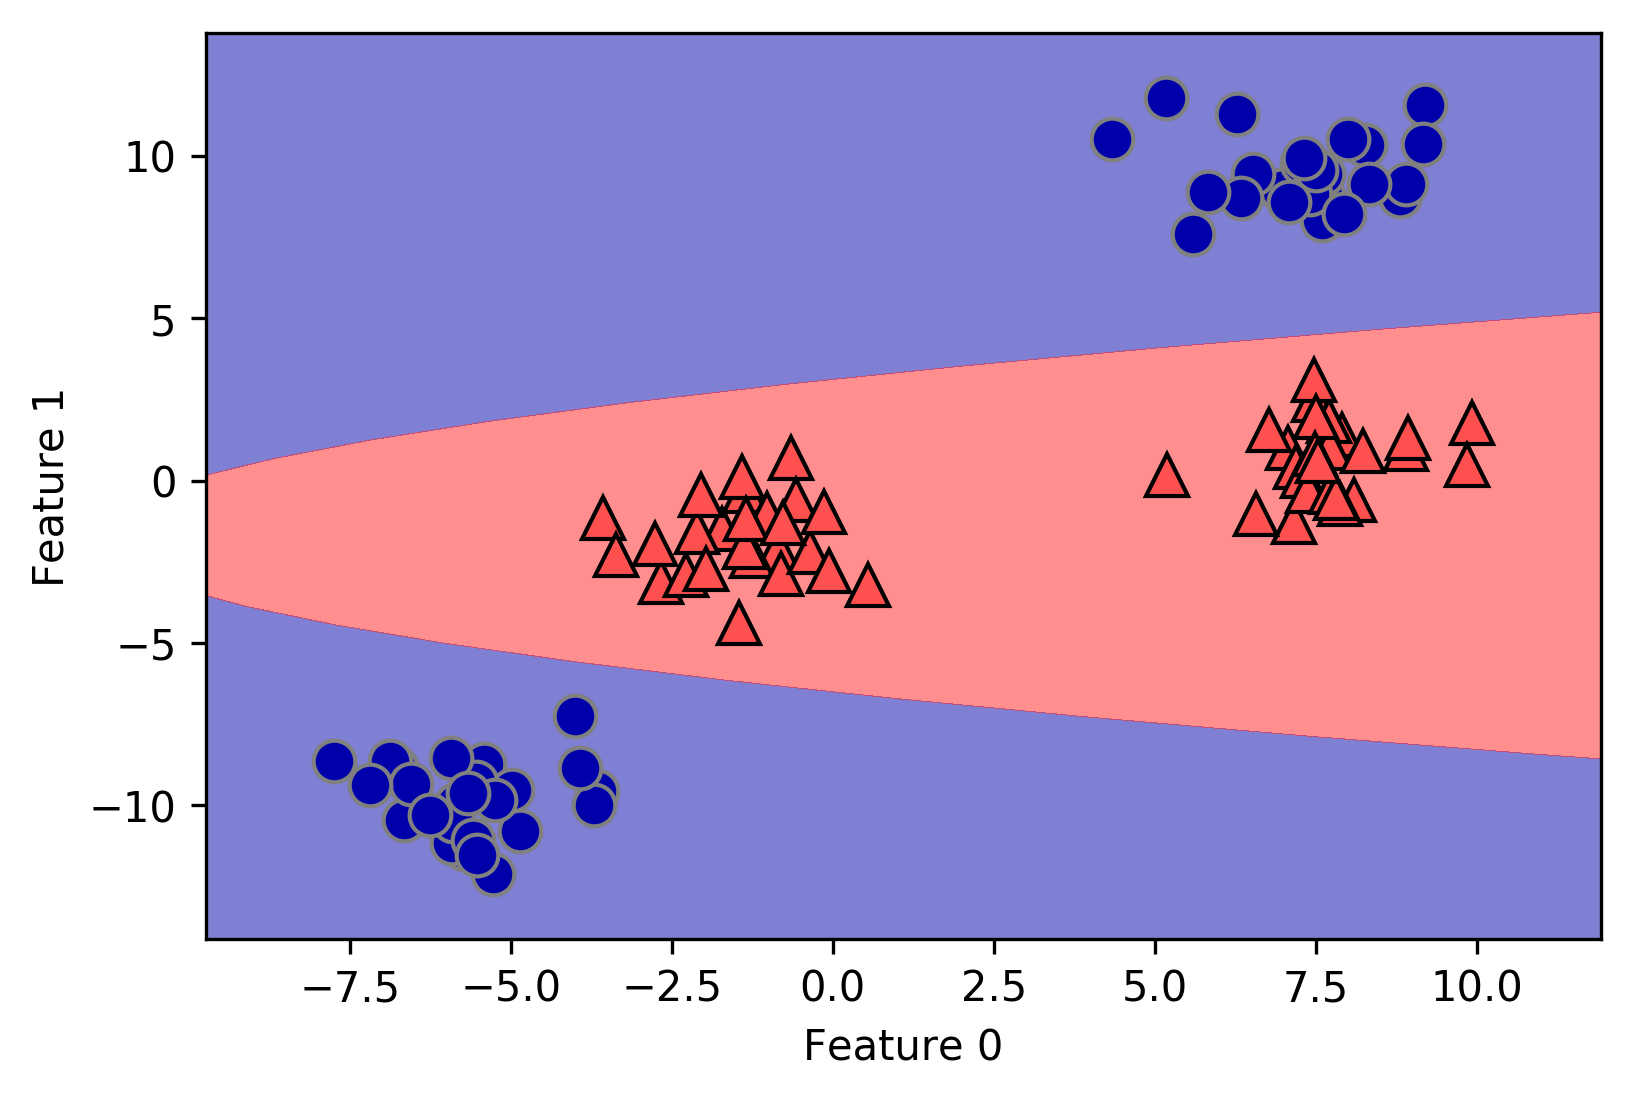

In [11]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [12]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
print("X.shape:", X.shape)
print("y.shape:", y.shape)

('X.shape:', (26L, 2L))
('y.shape:', (26L,))


[[  8.106   4.287]
 [  9.502   1.938]
 [ 11.564   1.339]
 [ 10.24    2.455]
 [  7.998   4.853]]
[[-10.     -6.252  -3.734  10.      9.986]]


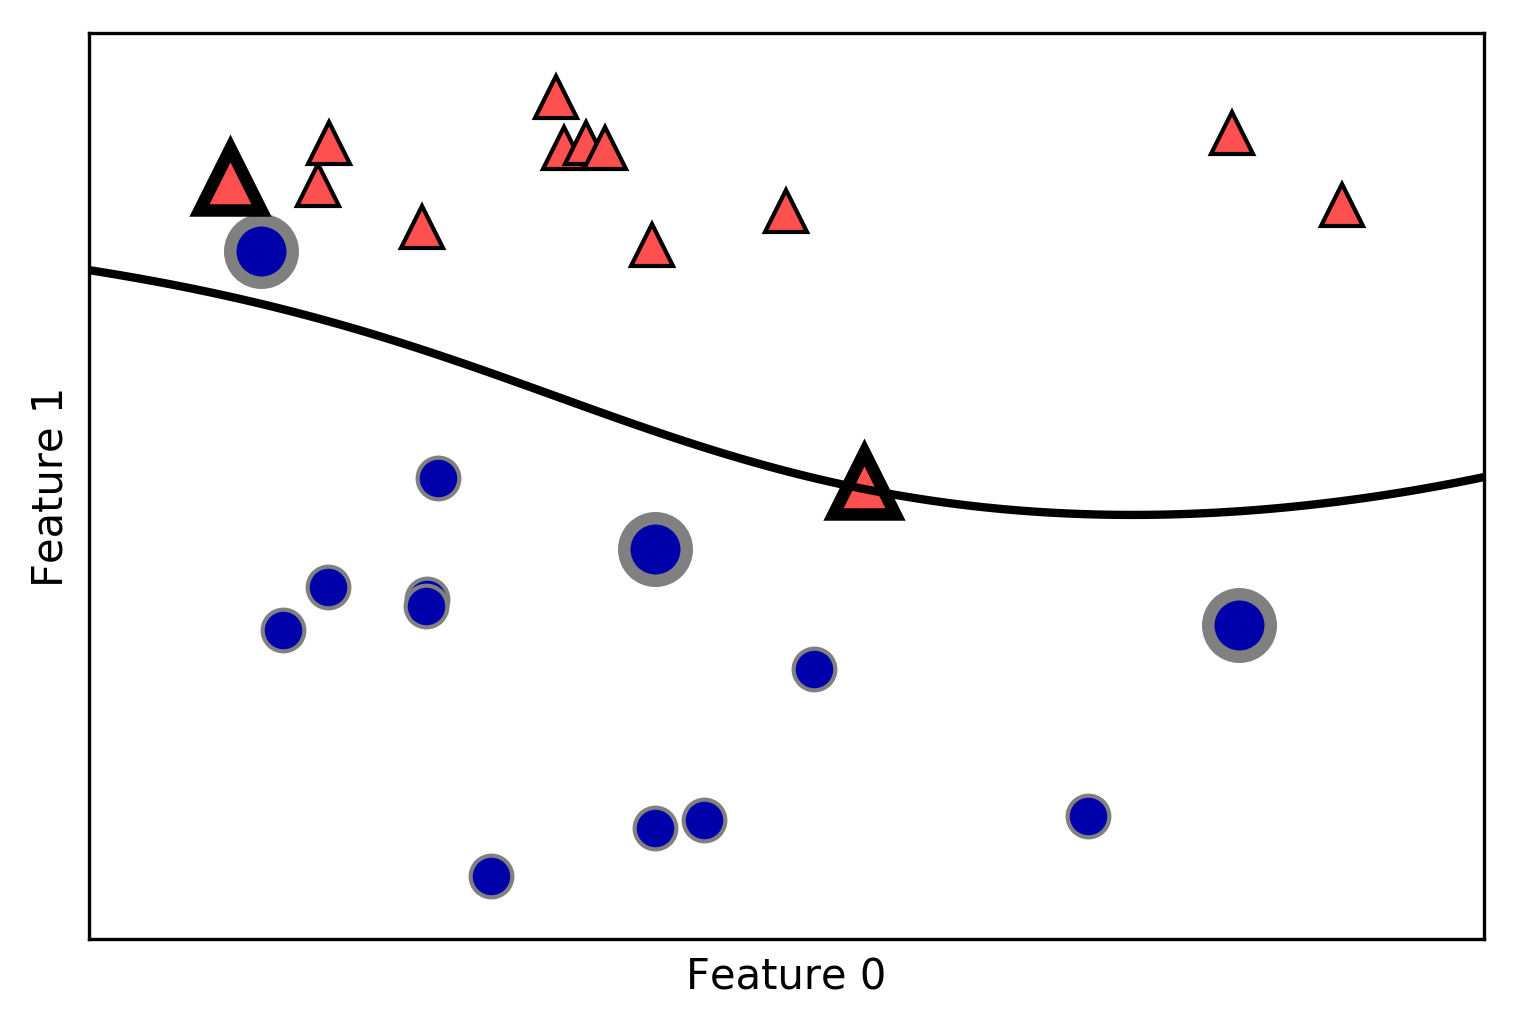

In [13]:
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv = svm.support_vectors_
dual_coef = svm.dual_coef_
print(sv)
print(dual_coef)

# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = dual_coef.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

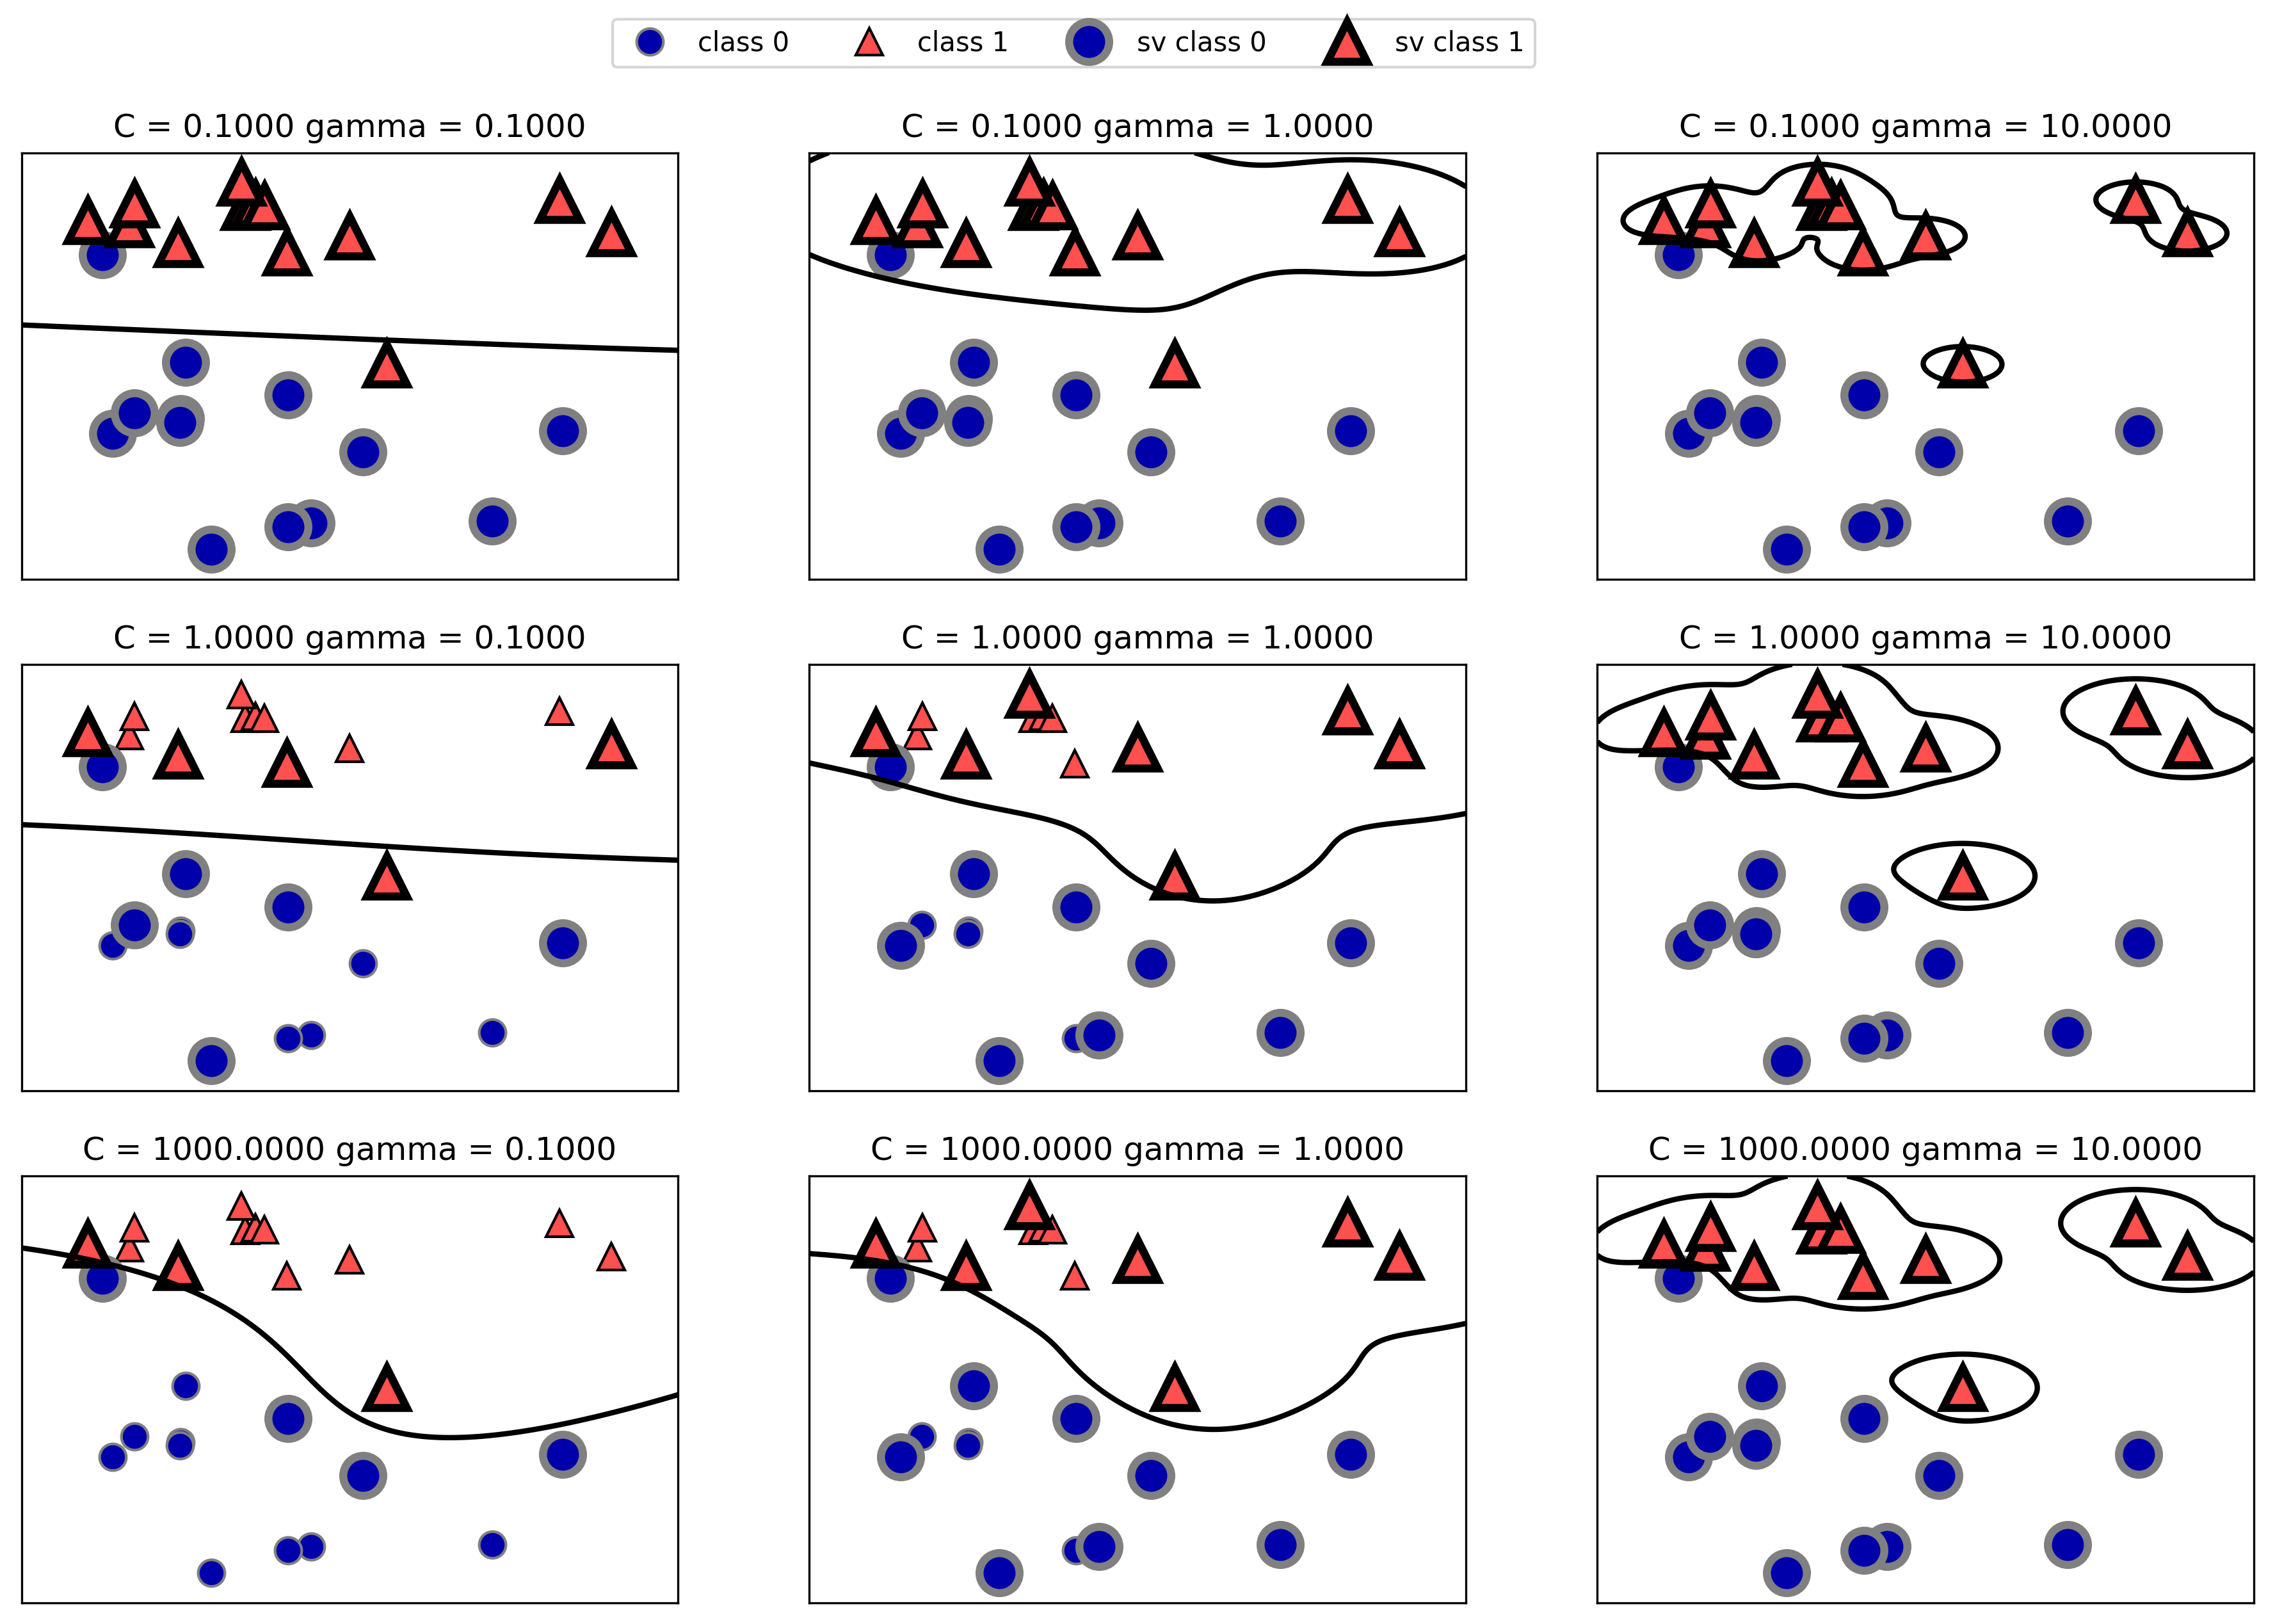

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, 
    cancer.target, 
    stratify=cancer.target, 
    random_state=66
)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63
